# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import display

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import sklearn
import re

import statsmodels.api as sm 
import seaborn as sns
sns.set_style('whitegrid')

from __future__ import division
from math import *
from scipy import integrate
from numpy import inf
from sklearn import mixture, neighbors 

from windrose import WindroseAxes, WindAxes

from helpers.utility_helper import *
from helpers.app_helper import *
from helpers.gmm_helper import *
from helpers.plot_helper import *
from helpers.data_reader import *

## 1.2 Read Data

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt'
ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 

# ipath= './data/NCDC/europe/ciampino/dat.txt' # Italy
# ipath= "./data/NCDC/europe/laupheim/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # France, double peak?
# ipath= "./data/NCDC/europe/avord/dat.txt" # France
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better
# ipath= "./data/NCDC/europe/barayas/dat.txt"

# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # India, not very good

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt" # 
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # sectors are 16

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # not quite good
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/binhai/dat.txt" # good, but recent 5 year data may have been corrupted, 05-09 is good
# ipath= "./data/NCDC/cn/luogang/dat.txt"  # good
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # good
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # 
# ipath= "./data/NCDC/cn/zhengding/dat.txt" # 
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # 
# ipath= "./data/NCDC/cn/wusu/dat.txt" # not quite good, try 4?
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # unable to fit with chi square
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Is this dataset correct?

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # good, but 1个方向的数据过少，很难拟合
# ipath= "./data/NCDC/cn/上海/虹桥/dat.txt" # good
# ipath= './data/NCDC/macau/dat.txt' # not good, feels like truncate data, try 4
# ipath= "./data/NCDC/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly over a threshold, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  # truancate data
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/8455636958433dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"

# not sample as %5, e.g. sampling time is 1852
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

# ipath= "./data/cn_database/beijing.txt"
# ipath= "./data/cn_database/xiamen.txt"
# ipath= "./data/cn_database/hefei.txt"
# ipath= "./data/cn_database/lasa.txt"
# ipath= "./data/cn_database/lenghu.txt"

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real

uipath = unicode(ipath , "utf8")
cn_database = False

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed' ]]
else:
    df = read_cn_database(uipath)
    cn_database = True

In [3]:
# select year 1945-2014, dir < 999, speed<999
df = df.query("(dir < 999) & (speed < 999) & \
              (date >= 19800000) & (date < 20160000) & \
              (HrMn % 5 == 0 )")

# Turn dir into [0,360), some station are[10,360],some are [0,350]
df.index= df['date']
df['dir'] = df['dir'].apply(lambda x: x%360)
df.describe()

,date,HrMn,dir,speed
count,444255.000000,444255.000000,444255.000000,444255.000000
mean,20003640.639952,1153.778427,193.652026,7.344985
std,108827.148764,666.947098,95.827907,3.776346
min,19800101.000000,0.000000,0.000000,0.500000
25%,19910202.000000,600.000000,140.000000,4.600000
50%,20020608.000000,1120.000000,200.000000,6.700000
75%,20110213.000000,1700.000000,270.000000,9.800000
max,20150801.000000,2350.000000,350.000000,36.000000


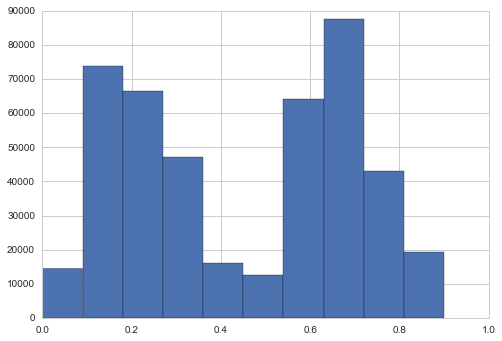

In [4]:
# Detect data stored in knot or m/s
df['decimal'] = df.speed % 1 
df.decimal.hist()
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

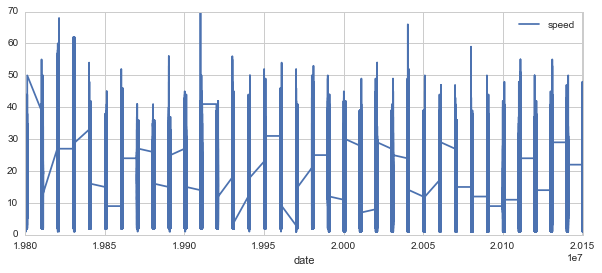

In [5]:
# Using speed unit in knot instead of m/s
# need more elaboration, some is not near an integer
if knot_unit:
    df.rename(columns={'speed':'speed_mps'}, inplace=True)
    df['speed']=df['speed_mps']
    df['speed']=df['speed_mps']*1.943845
    df['speed']=df['speed'].apply(lambda x: int(round(x)))

df['speed'].plot(legend=True,figsize=(10,4), grid=True)

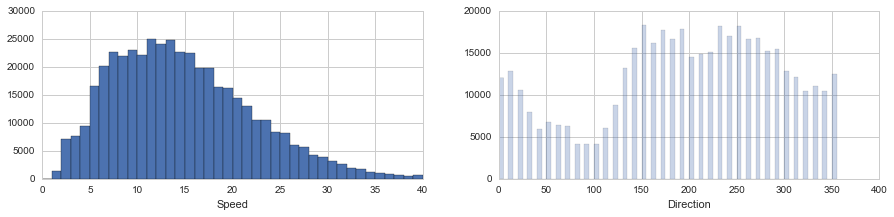

In [6]:
# Notice the gap of the distributions, so futher process needed, as below
plot_speed_and_angle_distribution(df)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

,date,HrMn,type,dir,speed_mps,decimal,speed,incre,incre_reverse
date,,,,,,,,,
19910103,19910103,600,FM-12,250,36.0,0.0,70,44,46
19821215,19821215,1235,AERO,130,35.0,0.0,68,45,41
20040421,20040421,1100,FM-12,160,34.0,0.0,66,32,32
19821219,19821219,925,AERO,130,33.4,0.4,65,40,36
19821225,19821225,1610,AERO,120,32.4,0.4,63,40,46
19830128,19830128,1615,AERO,120,31.9,0.9,62,38,37
19830730,19830730,1115,AERO,110,31.9,0.9,62,48,49
19831006,19831006,1830,AERO,130,31.9,0.9,62,43,49
19830626,19830626,725,AERO,110,31.9,0.9,62,45,45


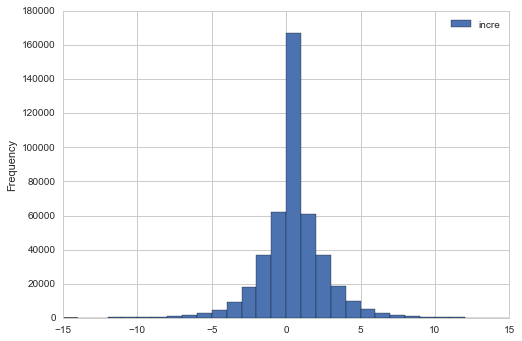

In [7]:
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0)
display(df.sort_values(by='speed',ascending=False).head(10))
bins=np.arange(-15, 15 + 1, 1)
df['incre'].plot(kind='hist', bins=bins, legend=True)

In [8]:
# Simple Artefacts Handling
incre_threshold = 20 if knot_unit else 10
df = df.query('(incre < @incre_threshold )&(incre_reverse < @incre_threshold )')
df = df.query('dir % 10 <= 0.1')

After Simple Aretefacts Handling

In [9]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed_mps,decimal,speed,incre,incre_reverse
date,,,,,,,,,
19890213,19890213,1500,FM-12,290,28.8,0.8,56,6,6
19930121,19930121,2100,FM-12,270,28.8,0.8,56,8,6
20111208,20111208,1400,FM-12,270,28.3,0.3,55,3,6
20131205,20131205,720,FM-15,300,28.3,0.3,55,6,12
19930117,19930117,500,FM-12,270,28.3,0.3,55,12,3
19840121,19840121,1900,FM-12,140,27.8,0.8,54,4,2
19961106,19961106,400,SY-MT,240,27.8,0.8,54,5,1
20111208,20111208,1150,FM-15,270,27.8,0.8,54,1,0
20111208,20111208,1200,FM-12,260,27.8,0.8,54,0,2


### 1.3.2 Sampling Time Selection

In [10]:
df['HrMn'].value_counts().sort_index()

0       12337
20       1605
35          1
40          1
45          1
50       2935
100     12412
105         1
115         2
120      1608
140         1
145         1
150      2933
200     12395
220      1611
245         1
250      2905
300     12488
320      1607
330         1
340         1
350      2929
400     12412
410         1
420      1626
430         1
450      2934
500     12412
505         2
510         3
        ...  
1935        1
1950     2952
2000    12456
2015        1
2020     1619
2025        1
2030        2
2035        1
2040        1
2050     2939
2100    12478
2120     1607
2130        1
2135        1
2140        1
2145        1
2150     2919
2200    12421
2205        2
2210        1
2215        1
2220     1603
2235        1
2250     2927
2300    12400
2305        1
2310        2
2320     1610
2330        1
2350     2919
Name: HrMn, dtype: int64

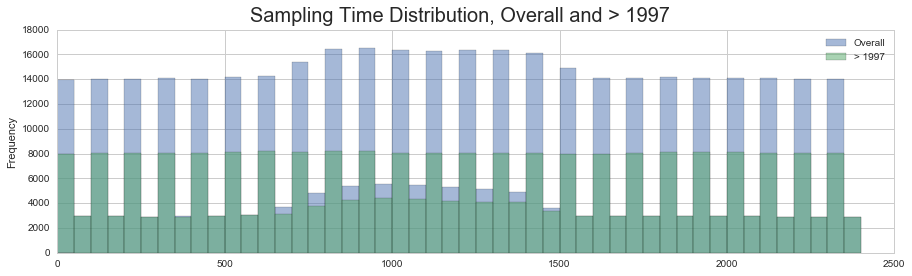

In [11]:
# Ensure data sampled equally
mid_year = int(((min(df.date)+max(df.date))/2 )/10000)
bins=np.arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='Overall')

df.query('date > @mid_year * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' %  mid_year )

plt.suptitle('Sampling Time Distribution, Overall and > %s ' %  mid_year, fontsize = 20)
plt.legend()

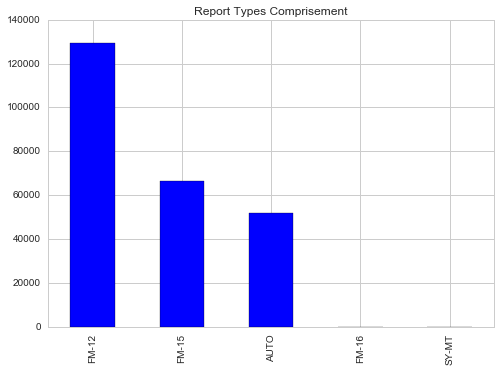

In [12]:
df.query("date >= 20000000 ")['type'].value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = df.query("date >= 20000000 ")['type'].value_counts().argmax()

In [13]:
# Data Selection
if "ciampino" in ipath: 
    df = df[(df['HrMn'] % 100 == 15)|(df['HrMn'] % 100 == 45)|(df['HrMn'] % 100 == 20)|(df['HrMn'] % 100 == 50)]
else: 
    df = df.query('HrMn % 5 <= 0.1')

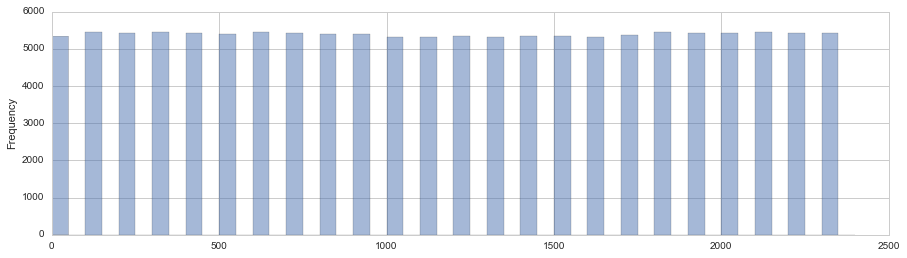

In [14]:
# We're gonna use the most frequent report type, here is its distirbution
df = df.query("type==@report_type_most_used")

df.query('date > 20000000')['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins)

## 1.3.3 Time Shift Comparison

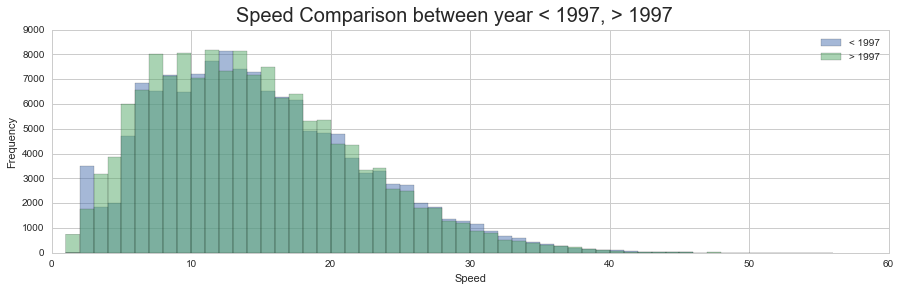

In [15]:
mid_year = int(((min(df.date)+max(df.date))/2 )/10000)

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = np.arange(min(df.speed), max(df.speed) + 1, 1)
df[df['date'] < mid_year * 10000]['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='< %s' % mid_year)

df[df['date'] > mid_year * 10000]['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' % mid_year)

plt.xlabel("Speed")
plt.suptitle('Speed Comparison between year < %s, > %s ' % (mid_year, mid_year), fontsize = 20)
plt.legend()

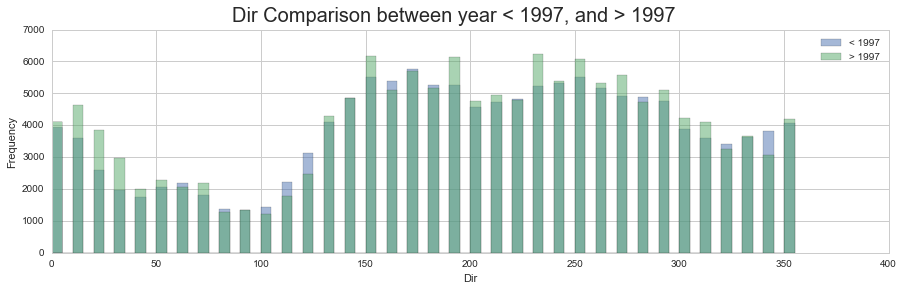

In [16]:
bins=np.arange(min(df.dir), max(df.dir) + 10, 5)
df[df['date'] < mid_year * 10000]['dir'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='< %s' % mid_year)

df[df['date'] > mid_year * 10000]['dir'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' % mid_year)

plt.xlabel("Dir")
plt.suptitle('Dir Comparison between year < %s, and > %s ' % (mid_year, mid_year), fontsize = 20)
plt.legend()

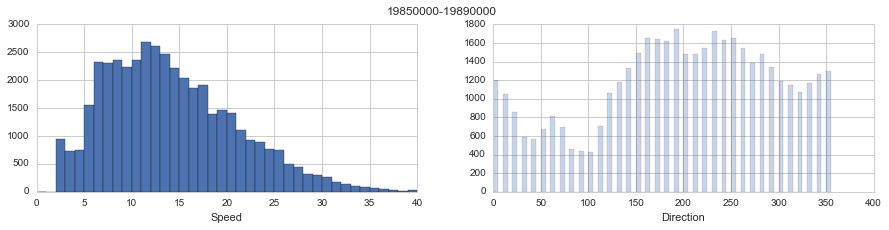

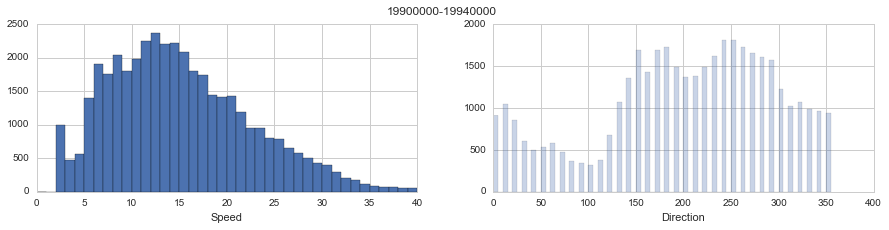

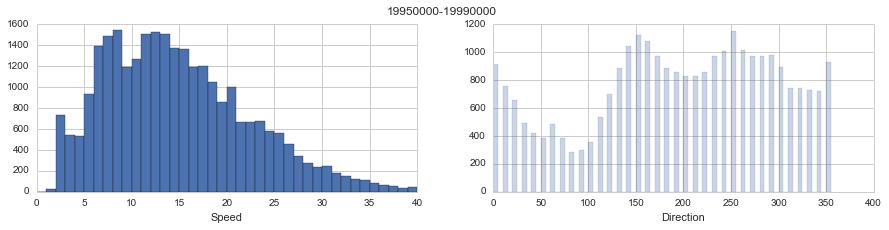

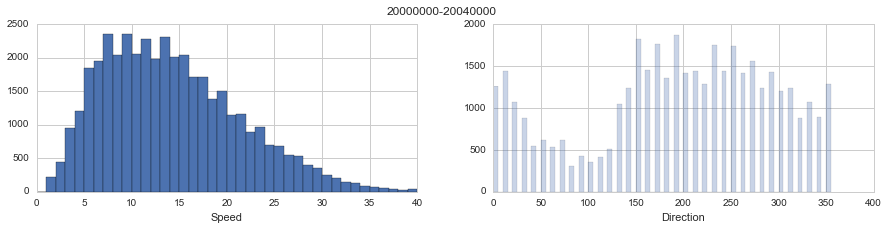

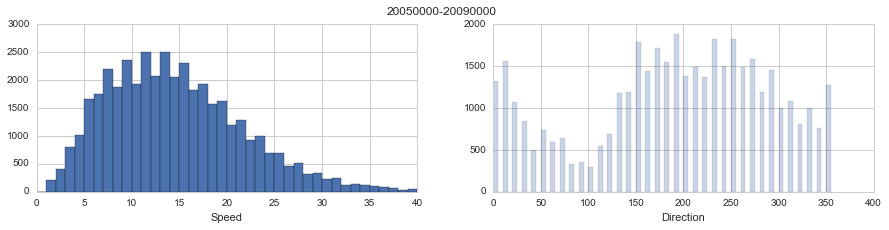

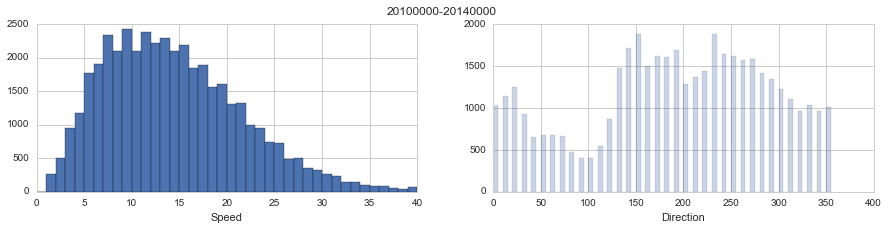

In [17]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19850000, 20150000, 50000):
        end_time = start_time + 50000 
        sub_df = df.query('(date >= @start_time) & (date < @end_time)')
        if len(sub_df) > 0 :
            title = str(start_time) +'-' + str(end_time-10000)
            plot_speed_and_angle_distribution(sub_df, title)
        
check_time_shift(df)

## 1.4 Re-select data, data conversion, and overview of the clean dataset

In [18]:
# Year range, Reports Type, Sampling Time
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

,date,HrMn,dir,speed_mps,decimal,speed,incre,incre_reverse
count,42762.000000,42762.000000,42762.000000,42762.000000,42762.000000,42762.000000,42762.000000,42762.000000
mean,20120725.808498,1149.207240,189.590057,7.164705,0.454682,13.926944,-0.014896,-0.020065
std,14140.166882,693.007266,95.768852,3.745616,0.270769,7.281049,0.555043,2.163327
min,20100101.000000,0.000000,0.000000,0.500000,0.000000,1.000000,-16.000000,-32.000000
25%,20110405.000000,500.000000,130.000000,4.100000,0.200000,8.000000,0.000000,-1.000000
50%,20120701.000000,1100.000000,200.000000,6.700000,0.500000,13.000000,0.000000,0.000000
75%,20131005.000000,1800.000000,267.500000,9.300000,0.700000,18.000000,0.000000,1.000000
max,20141231.000000,2300.000000,350.000000,28.300000,0.900000,55.000000,13.000000,19.000000


### 1.4.1 Overview

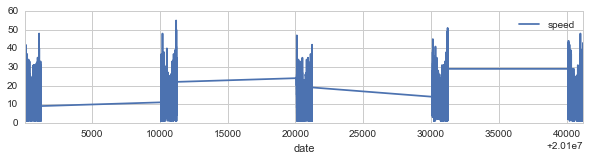

In [19]:
df['speed'].plot(legend=True,figsize=(10,2), grid=True)

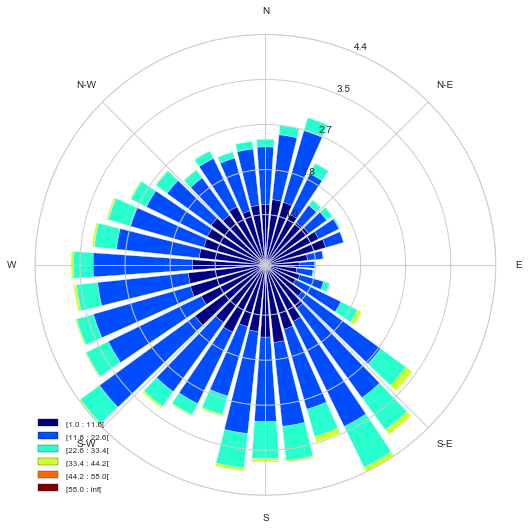

In [20]:
df.dir_windrose = df.dir
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

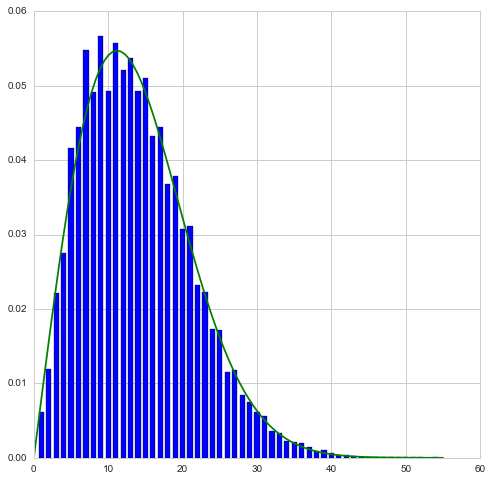

In [21]:
ax = WindAxes.from_ax()
bins=np.arange(min(df.speed), max(df.speed) + 1, 1)
ax, params = ax.pdf(df.speed, bins = bins)

In [22]:
print params
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
print weibull_params

(1, 2.0120874233481185, 0, 15.73570629824075)
(1, 2.0120874233481185, 0, 15.73570629824075)


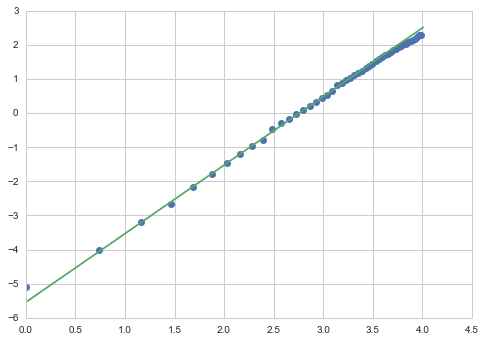

In [23]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=np.exp(-(x/c_shape)**w_scale)
plt.plot(np.log(x), np.log(-np.log(qz)),'-')
plt.show()

### 1.4.2 Direction Conversion, from windrose to polar system
e.g. 0 degree = north, clockwise => 90 degree = north, counterclockwise

In [24]:
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360)

In [25]:
df['dir'].value_counts().sort_index()

0       406
10      478
20      666
30      681
40      677
50      660
60      927
70     1250
80     1147
90     1030
100    1016
110     962
120    1038
130     964
140    1114
150    1232
160    1352
170    1424
180    1589
190    1575
200    1618
210    1641
220    1881
230    1446
240    1374
250    1286
260    1693
270    1609
280    1619
290    1507
300    1882
310    1713
320    1482
330     874
340     546
350     403
Name: dir, dtype: int64

In [26]:
effective_coloumn = df['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()

if len(effective_coloumn) == 16:
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_coloumn.sort_index().index)
    redistributed_angle = np.linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

In [27]:
df.describe()

,date,HrMn,dir,speed_mps,decimal,speed,incre,incre_reverse
count,42762.000000,42762.000000,42762.000000,42762.000000,42762.000000,42762.000000,42762.000000,42762.000000
mean,20120725.808498,1149.207240,193.717085,7.164705,0.454682,13.926944,-0.014896,-0.020065
std,14140.166882,693.007266,90.957848,3.745616,0.270769,7.281049,0.555043,2.163327
min,20100101.000000,0.000000,0.000000,0.500000,0.000000,1.000000,-16.000000,-32.000000
25%,20110405.000000,500.000000,120.000000,4.100000,0.200000,8.000000,0.000000,-1.000000
50%,20120701.000000,1100.000000,200.000000,6.700000,0.500000,13.000000,0.000000,0.000000
75%,20131005.000000,1800.000000,270.000000,9.300000,0.700000,18.000000,0.000000,1.000000
max,20141231.000000,2300.000000,350.000000,28.300000,0.900000,55.000000,13.000000,19.000000


### 1.4.3 Re-distribute Direction, within each sector (optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [28]:
sector_length = 360/len(effective_coloumn)
print len(effective_coloumn), sector_length

def randomize_angle(df, sector_length = 10):
    df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2))% 360)

    bins=np.arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
    bins=np.arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

36 10.0


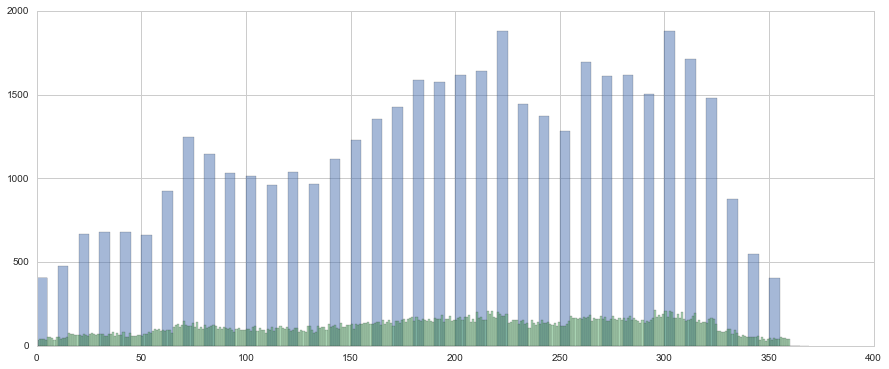

In [29]:
# Randomize the angle degree, to form a better KDE estimation
df['dir_int'] = df['dir']
df = randomize_angle(df, sector_length)

In [30]:
def randomize_speed(df):
    # Round down speed, need more caution
    df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)

    bins=np.arange(0, df.speed.max(), 1)
    df['speed'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
    bins=np.arange(0, df.speed.max(), 0.5)
    df['speed_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

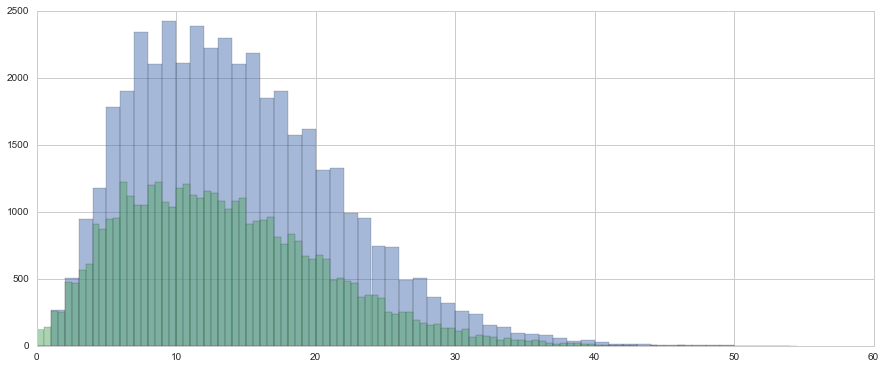

In [31]:
# Each original cell is split between the value, # so the peak is shift left
# e.g. 2 -> (1.5,2), (2,2.5); or 3 -> (2,3)
df['speed_int'] = df['speed']
df = randomize_speed(df)

### 1.4.4 Generate (x,y) from (speed,dir)

-2.12244097957 -2.75389799019


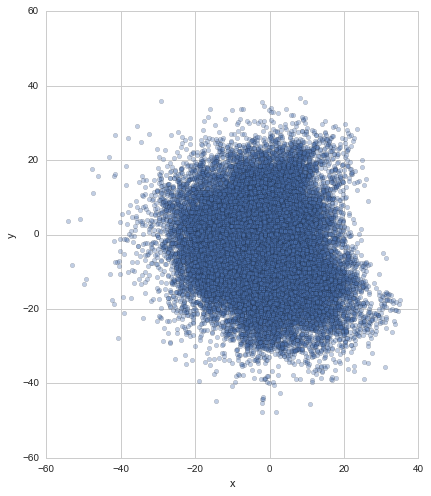

In [32]:
df['x'] = df['speed'] * np.cos(df['dir'] * np.pi / 180.0)
df['y'] = df['speed'] * np.sin(df['dir'] * np.pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax)
print np.mean(df.x), np.mean(df.y)

# 2. Create input data, i.e. speed_set

In [33]:
# speed_set = np.array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
speed_set = np.array(zip(df.x, df.y))
speed_angle_set = np.array(zip(df.speed, df.dir))
max_speed = df.speed.max()
number_of_gaussian = 3

In [34]:
fitting_range = []
if knot_unit == True:
    fitting_axis_range = np.arange(-20, 21, 1)
    plot_axis_range = np.arange(-25, 25, 1)
else:
    fitting_axis_range = np.arange(-10, 11, 1)
    plot_axis_range = np.arange(-10, 11, 1)
    
for i in fitting_axis_range:
    for j in fitting_axis_range:
        fitting_range.append([i,j])

original_dim = int(np.sqrt(len(fitting_range))) 

# 3. Kernel Density Estimation

In [35]:
sample = speed_set

In [36]:
# # The bandwidth value would be too radical, so we forsake this approach
# from sklearn.grid_search import GridSearchCV
# grid = GridSearchCV(neighbors.KernelDensity(),
#                     {'bandwidth': np.linspace(0.1, 1.0, 15)},
#                     n_jobs=-1, cv=4) 
# grid.fit(sample)
# print grid.best_params_
# kde = grid.best_estimator_

In [37]:
bandwidth = 1 if knot_unit else 0.5  # for wuhan, 0.4 is better
kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample)

points = fitting_range
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = np.exp(kde.score_samples(points))
print kde_result[:5]
print len(kde_result)

[  3.75501672e-05   4.60860061e-05   5.31555090e-05   5.50684870e-05
   7.56834462e-05]
1681


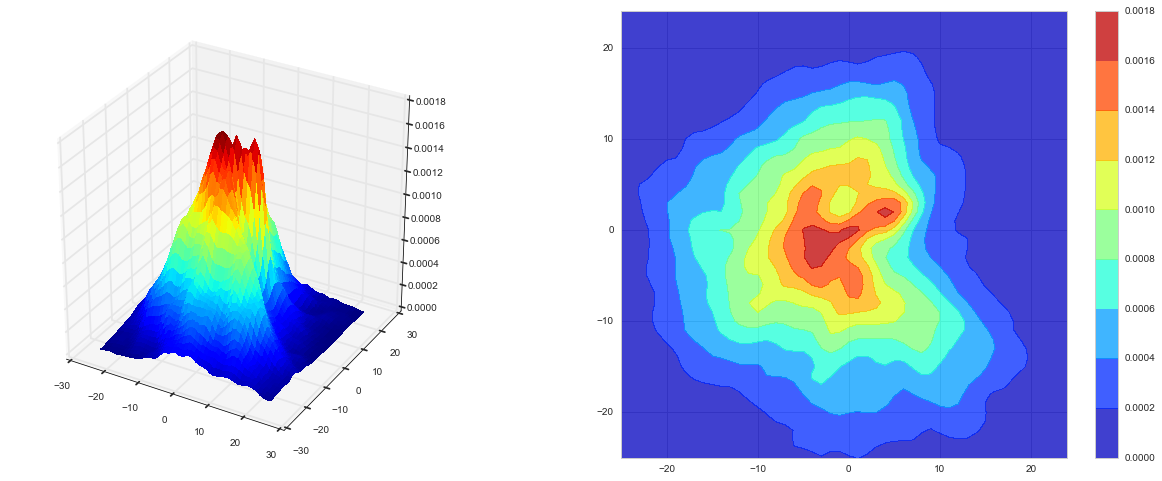

In [38]:
# Plot jPDF
X = Y = plot_axis_range
# Can't work if pass as generate_Z_from_X_Y(X,Y, np.exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: np.exp(kde.score_samples(coords)))

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,kde_Z,ax2)

In [39]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM Estimation, using EM algo

In [40]:
sample= speed_set
clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
clf.fit(sample)

clf.converged_

True

In [41]:
gmm_em_result = read_gmm_em_result(clf, print_result = False)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.349235,-0.312541,4.697114,7.069039,8.678341,0.177547
1,0.335967,-9.449639,-3.239010,8.908383,9.479750,-0.138350
2,0.314798,3.689588,-10.502288,9.172585,9.080268,-0.270542


GMM Plot Result
0.314797797001 [[  3.68958761 -10.50228787]] [  7.79388785  10.28799751] -133.929344762
0.335966757591 [[-9.44963913 -3.23900973]] [ 8.47362282  9.87029202] -147.104908702
0.349235445408 [[-0.31254106  4.69711398]] [ 6.77741141  8.90795185] 159.658851997


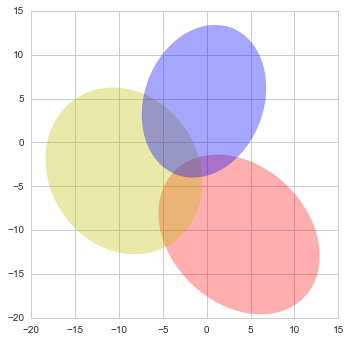

In [42]:
plot_gmm_ellipses(gmm_em_result)

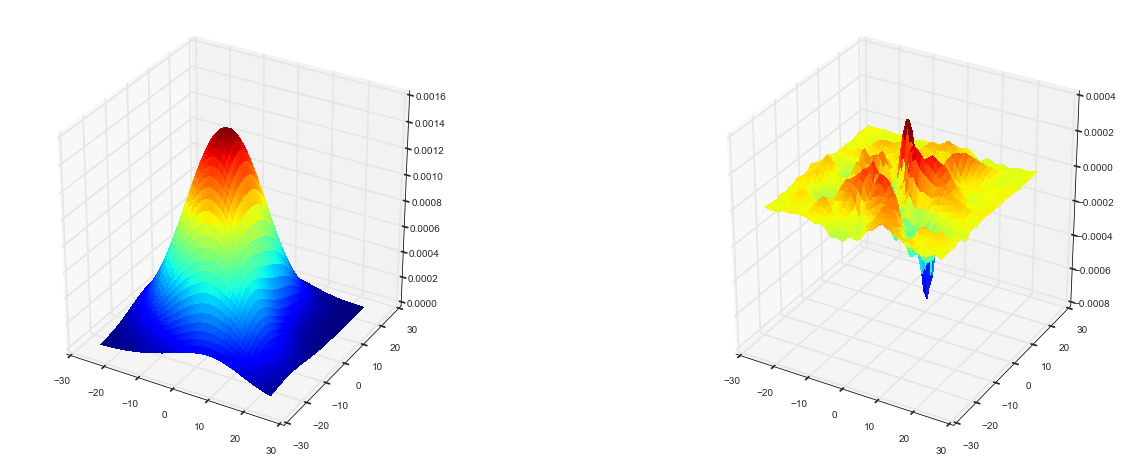

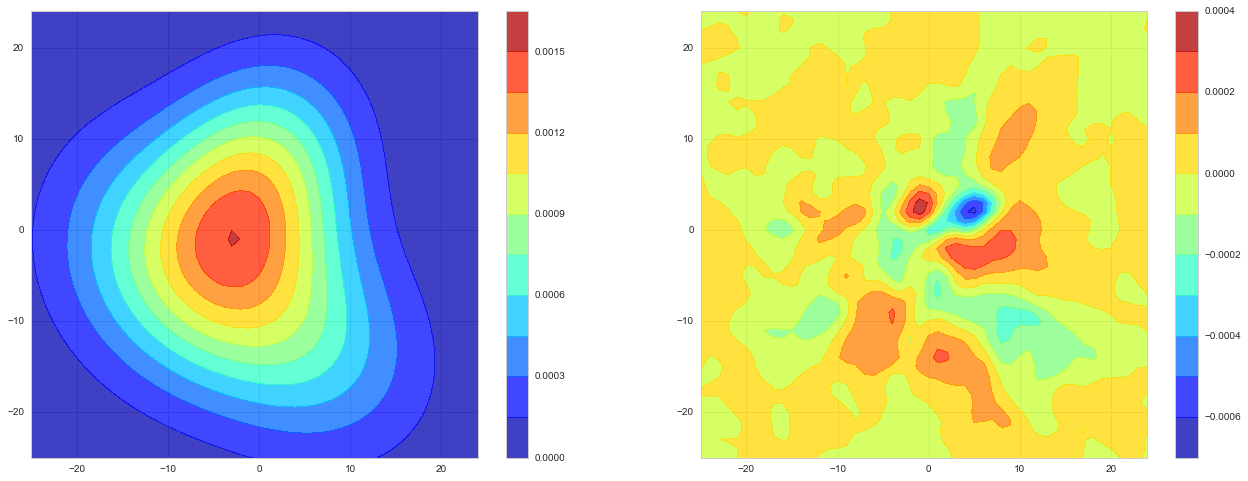

In [43]:
X = Y = plot_axis_range
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: np.exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = np.exp(kde.score_samples(points))
    gmm_vals = np.exp(clf.score_samples(points)[0])
    return gmm_vals - kde_vals

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)
gmm_em_3d_fig = fig

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1)
plot_2d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,residual_Z,ax2)
gmm_em_2d_fig = fig

## GMM, EM VS. KDE

In [44]:
points = fitting_range
gmm_pdf_result = np.exp(clf.score_samples(points)[0])

In [45]:
# put into Pandas to make it looks better
pd.DataFrame([goodness_of_fit_summary(gmm_pdf_result, kde_result, count = len(df))])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,1053.684058,0.010534,9.027258e-09,0.055687,0.180014,0.947503


# 5. Least Square Prob Estimation

In [46]:
sample = speed_set
points = fitting_range

In [47]:
gmm_em_result = read_gmm_em_result(clf, print_result = False)
pretty_print_gmm(gmm_em_result)             

,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.349235,-0.312541,4.697114,7.069039,8.678341,0.177547
1,0.335967,-9.449639,-3.239010,8.908383,9.479750,-0.138350
2,0.314798,3.689588,-10.502288,9.172585,9.080268,-0.270542


In [48]:
count = len(df)
def GMM_fit_score(gmm, kde_result, method = 'square_error'): 
    # 1. Create the GMM PDF
    if not isinstance(gmm[0], np.ndarray):
        gmm = group_gmm_param_from_gmm_param_array(gmm, sort_group = False)
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    # 2. Fit the model using different metrics
    gmm_pdf_result = mixed_model_pdf(points)
    if method == 'square_error':
        # 2.1 Square error
        error_array = np.power(gmm_pdf_result - kde_result,2)
        result = mse_log = np.log(np.average(error_array))
    elif method == 'chi_square':
        # 2.2 Chi square
        error_array = np.power(gmm_pdf_result - kde_result,2)
        # unable to * count = 43412
        result = chi_square_stat = sum(error_array/gmm_pdf_result) 
    elif method == 'K_S':
        # 2.3 K-S statistc
        gmm_cdf = cdf_from_pdf(gmm_pdf_result)
        diff = np.absolute(gmm_cdf - kde_cdf)
        result = KS_stat = np.amax(diff)
    return result

# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
    # sum of every 6th element, which is the fraction of each gaussian
    {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
    # limit the width/height ratio of elliplse, optional
#     {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#     {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-30, 30),(-30, 30),(0., 30),(0., 30),(-0.99, 0.99)]*int(len(x0)/6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, 'chi_square'),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: 0.017141673442674064
     jac: array([ -2.67465678e-02,   4.88944352e-09,  -4.65661287e-10,
        -2.32830644e-10,  -1.39698386e-08,  -1.90921128e-08,
        -2.67473850e-02,   2.32830644e-09,  -4.88944352e-09,
         1.35041773e-08,  -5.58793545e-09,   1.65309757e-08,
        -2.67470330e-02,   2.32830644e-08,   8.84756446e-09,
        -2.63098627e-08,  -2.32830644e-10,   7.14790076e-08,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 3311
     nit: 165
    njev: 165
  status: 0
 success: True
       x: array([  0.0626029 ,   9.31047689, -11.52909876,   5.7877927 ,
         4.34056803,  -0.44449508,   0.56475245,  -5.42955371,
        -5.94319335,  11.63299472,  10.18848342,  -0.3529484 ,
         0.37264465,  -0.66638609,   4.19089463,   6.87694953,
         8.28720548,   0.22876761])

## LRMSE VS. KDE

In [49]:
kde_result[:5]

array([  3.75501672e-05,   4.60860061e-05,   5.31555090e-05,
         5.50684870e-05,   7.56834462e-05])

In [50]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)

pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.564752,-5.429554,-5.943193,11.632995,10.188483,-0.352948
1,0.372645,-0.666386,4.190895,6.876950,8.287205,0.228768
2,0.062603,9.310477,-11.529099,5.787793,4.340568,-0.444495


GMM Plot Result
0.564752449461 [[-5.42955371 -5.94319335]] [  8.65234235  12.81673642] -124.677841777
0.372644647658 [[-0.66638609  4.19089463]] [ 6.41276272  8.65139779] 154.678264362
0.0626029028808 [[  9.31047689 -11.52909876]] [ 3.57945517  6.28701645] -118.361063842


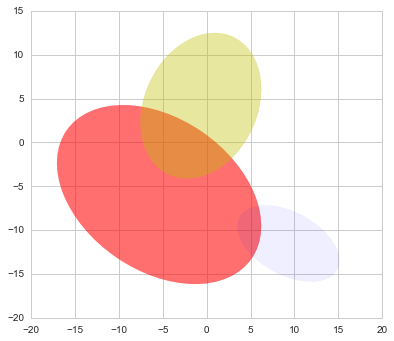

In [51]:
plot_gmm_ellipses(gmm)

## Goodness-of-fit indicators

In [52]:
pd.DataFrame(
    [goodness_of_fit_summary(gmm_pdf_result, kde_result, count = len(df))])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,733.01224,0.002941,6.508841e-09,0.047286,0.152856,0.962149


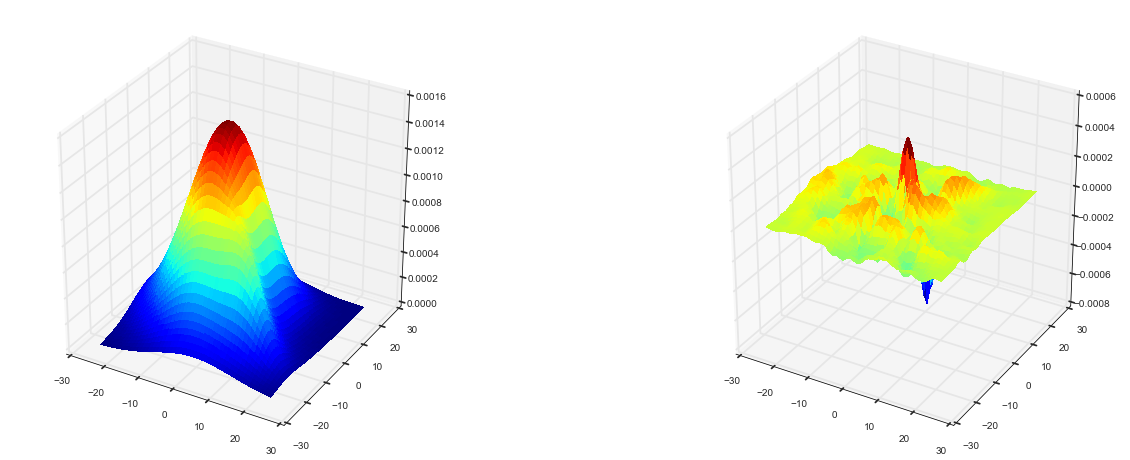

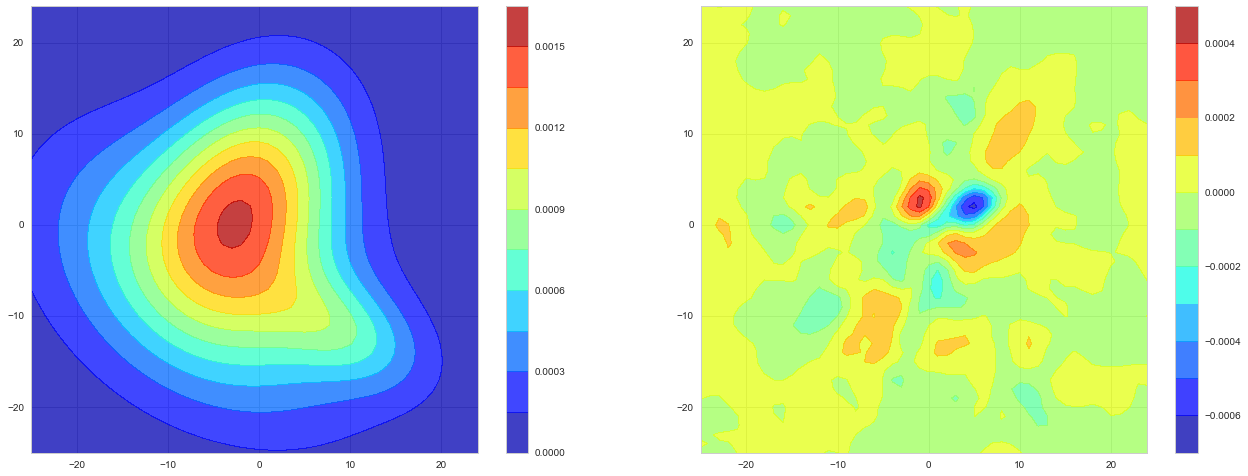

In [53]:
X = Y = plot_axis_range
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = np.exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return gmm_vals - kde_vals

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1)
plot_2d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,residual_Z,ax2)

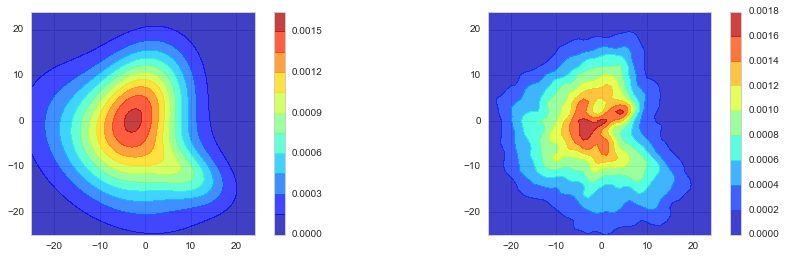

In [54]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1)
plot_2d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,kde_Z,ax2)

In [55]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

x_vals_OEN3_LMSE  = np.arange(0, max_speed, 0.5)
y_vals_OEN3_LMSE =[integrate.nquad(f, [[0, x_val],[0, 2*np.pi]]) for x_val in x_vals_OEN3_LMSE ]

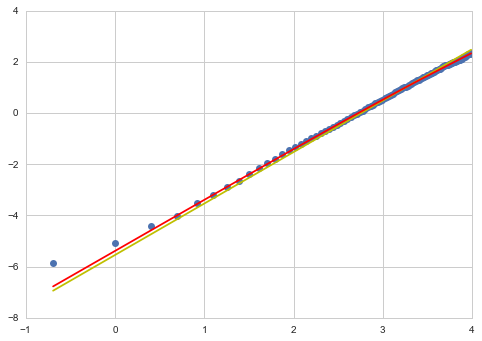

In [56]:
sample = df.speed
x = np.arange(0, max_speed, 0.5)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(sample)
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

# 2. Weibull distribution
w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=np.exp(-(x/c_shape)**w_scale)
plt.plot(np.log(x), np.log(-np.log(qz)),'-', color = 'y')

# 3. OEN3 distribution, LMSE
x, y_ = x_vals_OEN3_LMSE, y_vals_OEN3_LMSE
y = np.array(zip(*y_)[0])
plt.plot(np.log(x), np.log(-np.log(1-y)),'-', color = 'r')

plt.show()

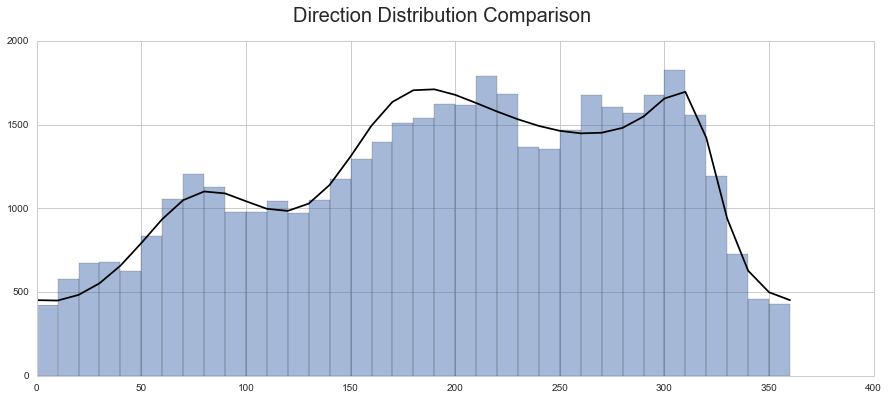

In [57]:
# Calculate Angle Distribution
x_vals = np.linspace(0,2*np.pi, num=36+1)
y_vals_ =[integrate.nquad(f, [[0, inf],[x_val-np.pi/36, x_val+np.pi/36]]) for x_val in x_vals]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y_vals = np.array(zip(*y_vals_)[0])*len(df['dir']) 

bins=np.arange(0, 360 + 1, 10)
df['dir'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

plt.plot(x_vals/np.pi*180, y_vals,'-', color='black')
plt.suptitle('Direction Distribution Comparison', fontsize = 20)
plt.show()

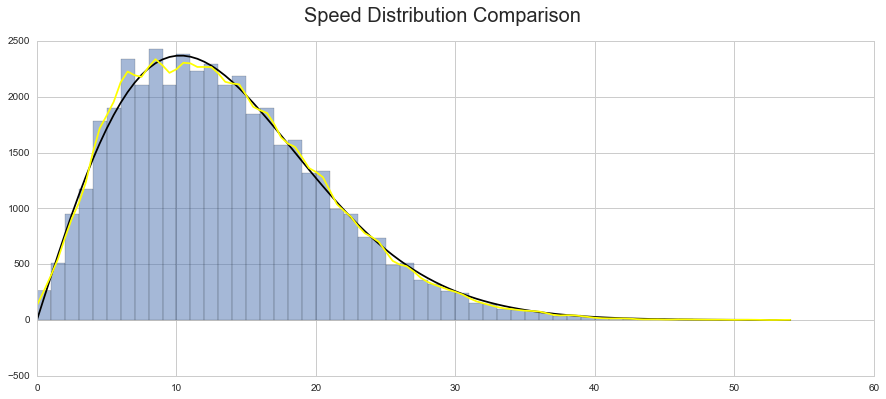

In [58]:
# Calculate Speed Distribution
# 1. GMM Model
x_vals = np.arange(0, max_speed, 0.5)
y_vals_ =[integrate.nquad(f, [[x_val-0.5, x_val+0.5],[0, 2*np.pi]]) for x_val in x_vals]
y_vals = np.array(zip(*y_vals_)[0])*len(df.speed)
plt.plot(x_vals, y_vals,'-', color='black')

# 2. Observation
bins = np.arange(0, max_speed, 1)
df['speed'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

# 3. 1d KDE
sample = np.array(df.speed).reshape(-1, 1)
kde_temp = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [np.exp(kde_temp.score_samples(x_val))*len(sample) for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

plt.suptitle('Speed Distribution Comparison', fontsize = 20)
plt.show()

In [59]:
# Calculate Speed Distribution
def model_data_comparison(df, original_sector_width = 10, incre = 10):
    start, end = original_sector_width/2 + incre/2, 360 - incre/2
    for angle in np.arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  

        # Select data from observation
        start_angle, end_angle = angle-incre/2, angle+incre/2
        sub_df= df[(df['dir'] >= start_angle) & (df['dir'] <= end_angle)] 
        max_speed = sub_df.speed.max()
        
        # 1. Count comparison
        # 1.1. Data Count
        bins = np.arange(0, max_speed, 1)
        sub_df['speed'].hist(bins=bins, alpha=0.5,figsize=(9, 2))
        
        # 1.2. Model Count
        x_vals = np.arange(0, max_speed, 0.5)
        y_vals_ =[integrate.nquad(f, 
                                  [[x_val-0.5, x_val+0.5],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                  for x_val in x_vals]
        y_vals = np.array(zip(*y_vals_)[0])*len(df.speed)
        plt.plot(x_vals, y_vals,'-', color='black')
    
        title = str(angle) + ' (' + str(start_angle) + '-' +str(end_angle) + ')'
        plt.suptitle(title+' Degree Speed Distribution Comparison', fontsize = 15)
        plt.show()      
        
        # 2. CDF, Weibull plot comparison
        # 2.1. Data's empirical distribution
        sample = sub_df.speed
        x =np.arange(0, max(sample), 0.5)
        ecdf = sm.distributions.ECDF(sample)
        y_cdf = ecdf(x)
        
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        y_gmm = np.array(zip(*y_)[0])/direction_prob[0]
        
#         # 2.3.1. P-P Plot
#         p_line = np.linspace(0, 1)
#         plt.plot(y_cdf, y_gmm,'o')
#         plt.plot(p_line, p_line,'-')
#         plt.show()
        
        # 2.3.2. Plot in ordinary axis
        plt.plot(x, y_cdf,'o')
        plt.plot(x, y_gmm,'-', color = 'r')
        plt.show()
        
        # 2.3.3. Plot in Weibull axis
        plt.plot(np.log(x), np.log(-np.log(1-y_cdf)),'o')
        plt.plot(np.log(x), np.log(-np.log(1-y_gmm)),'-', color = 'r')
        plt.show()

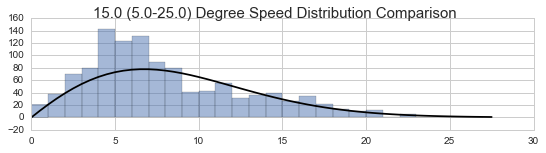

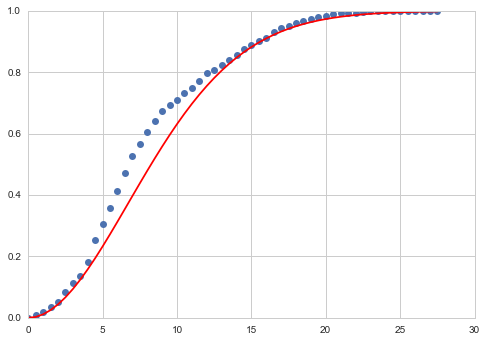

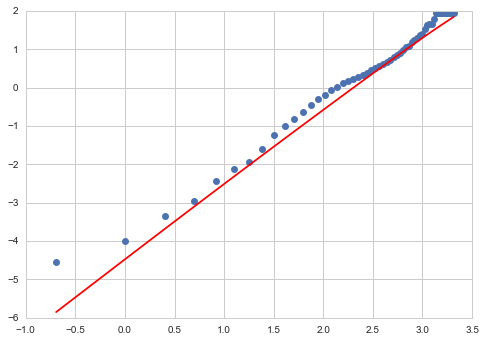

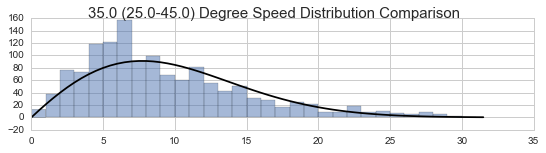

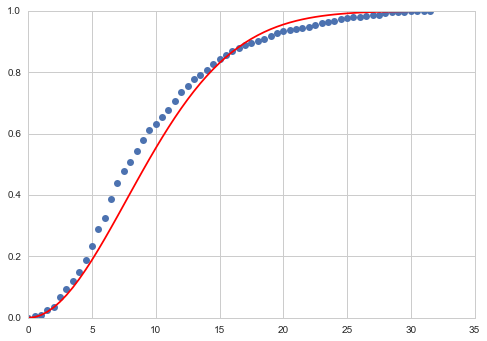

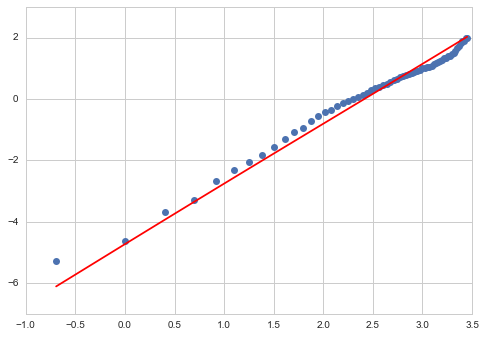

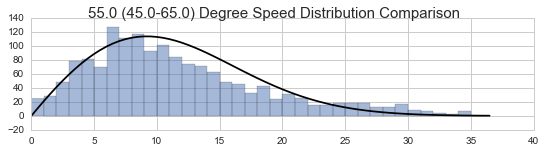

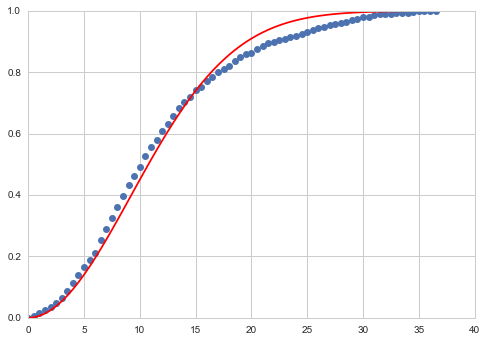

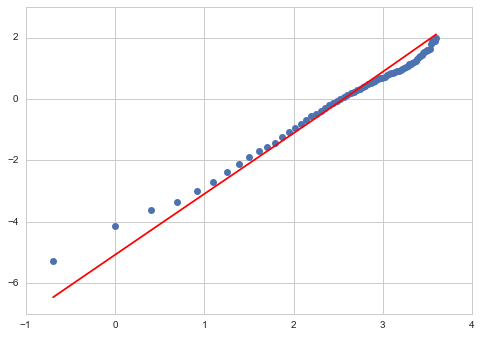

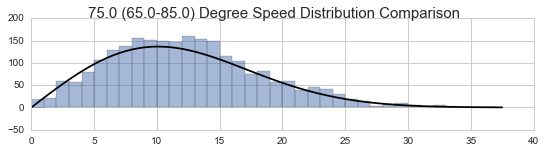

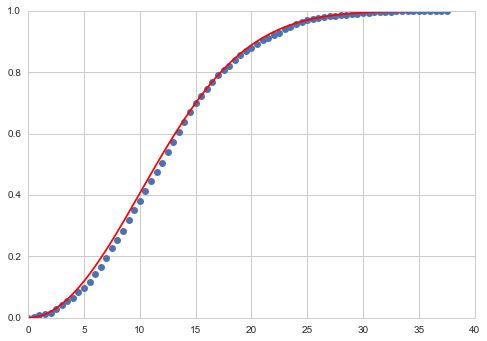

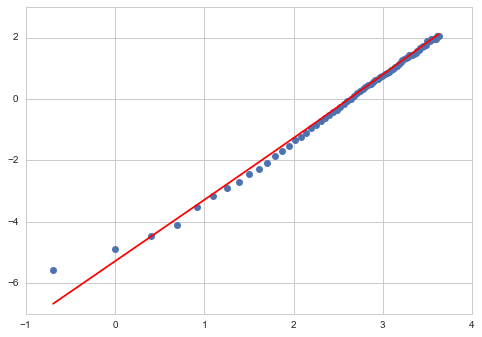

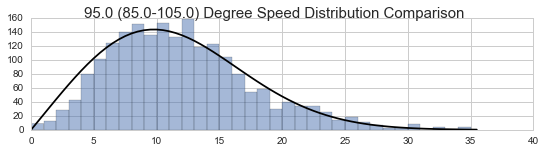

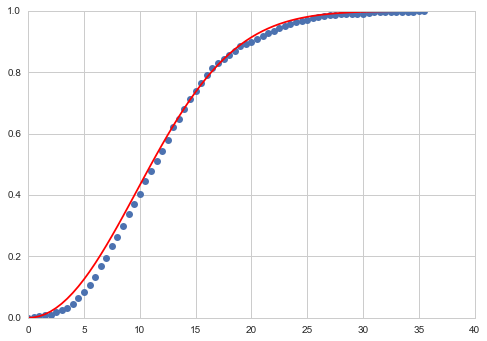

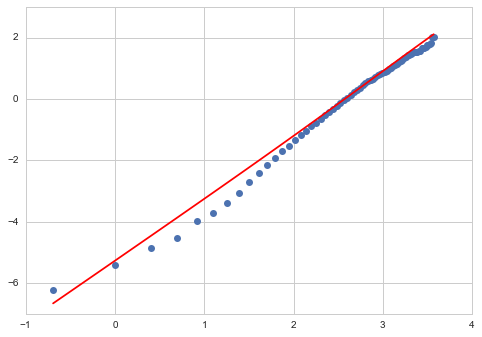

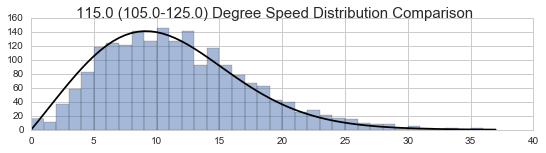

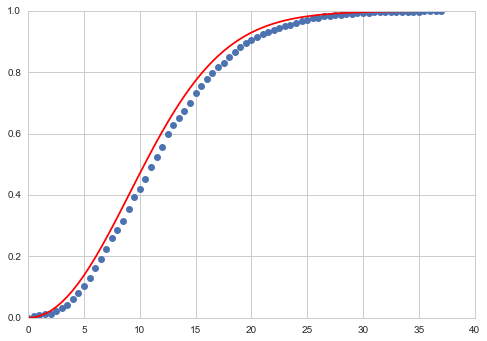

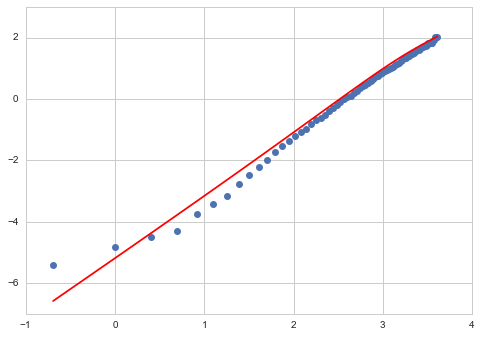

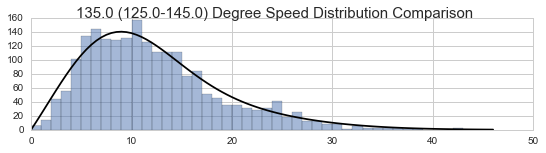

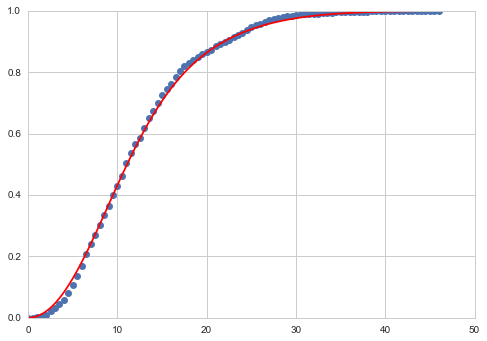

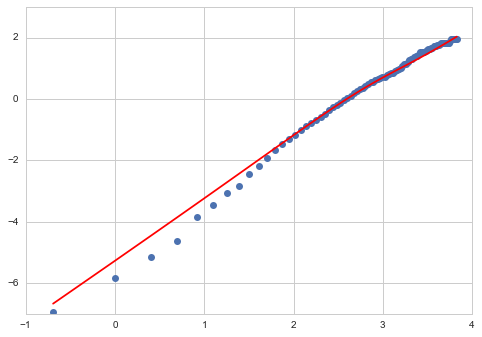

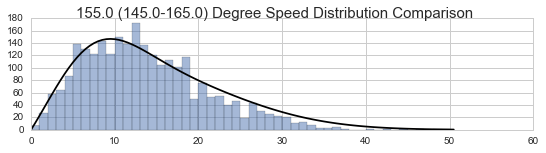

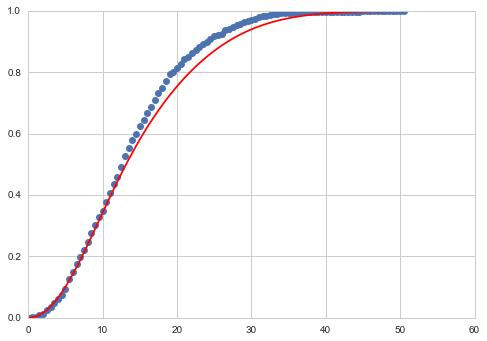

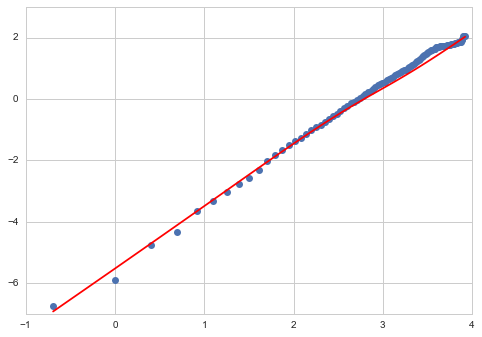

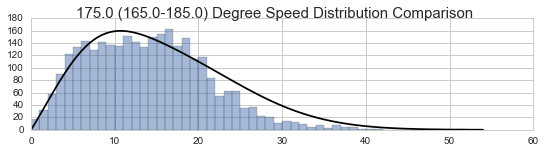

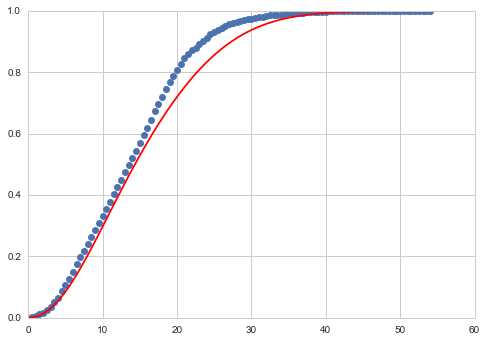

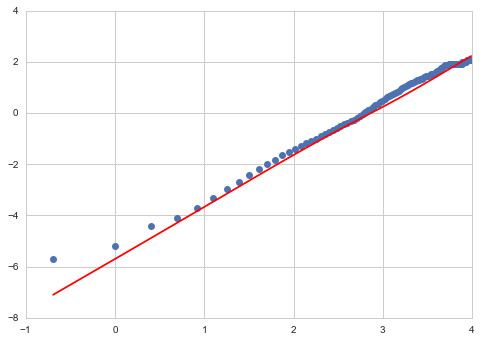

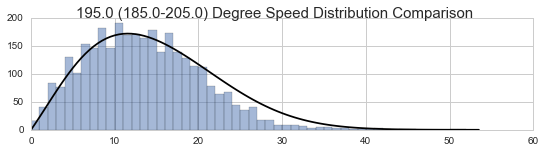

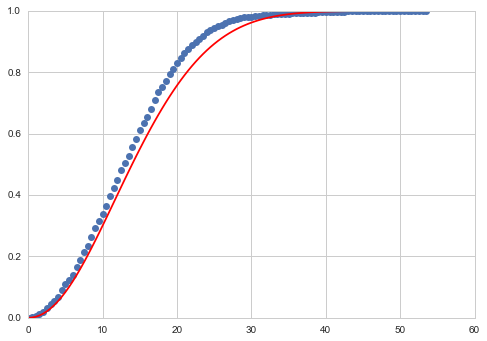

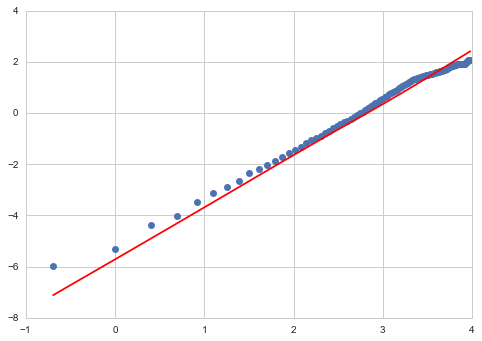

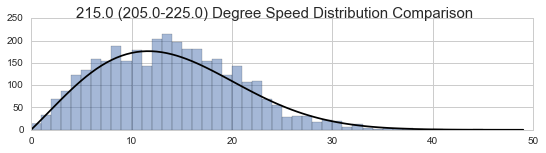

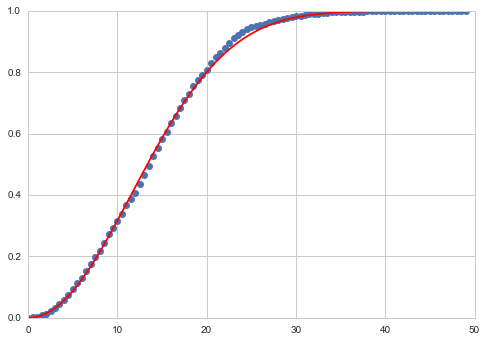

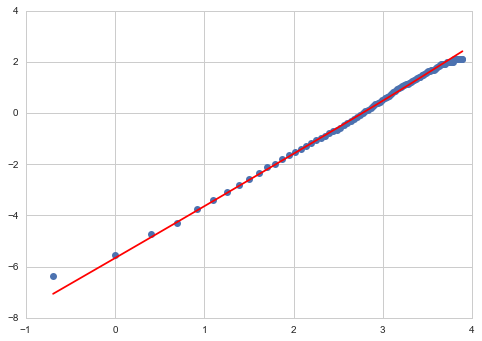

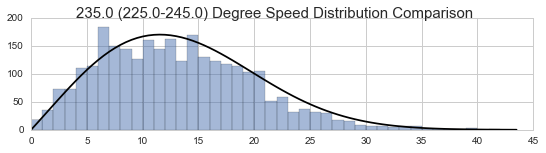

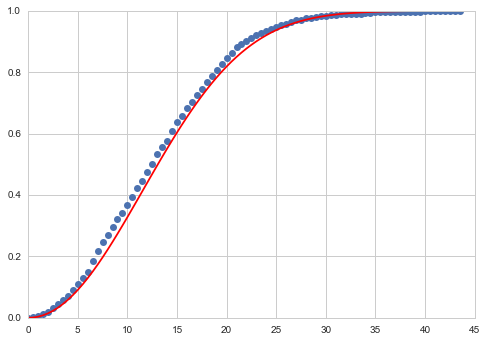

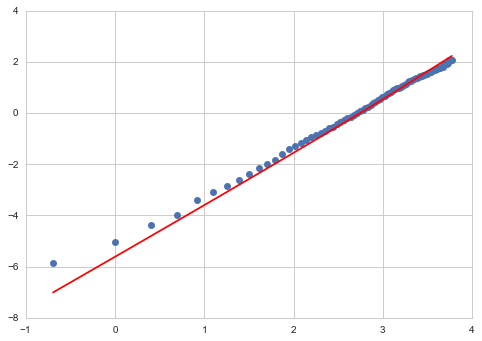

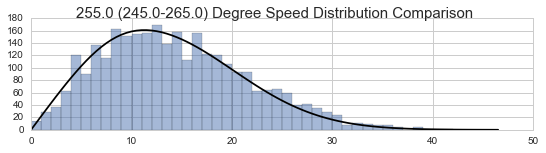

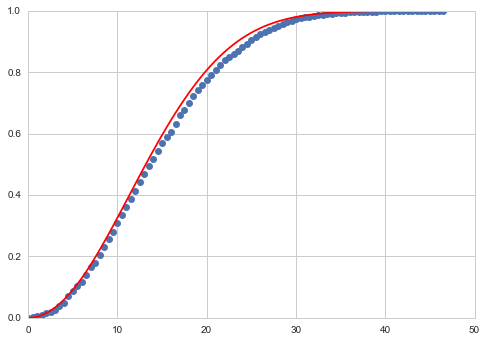

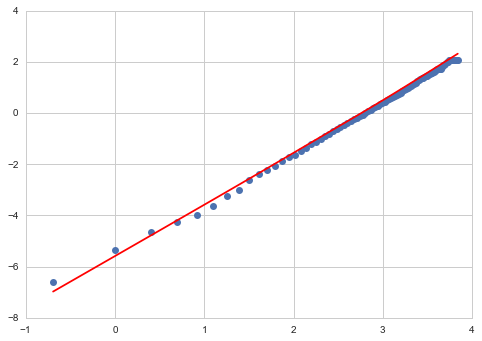

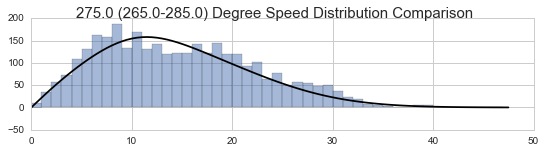

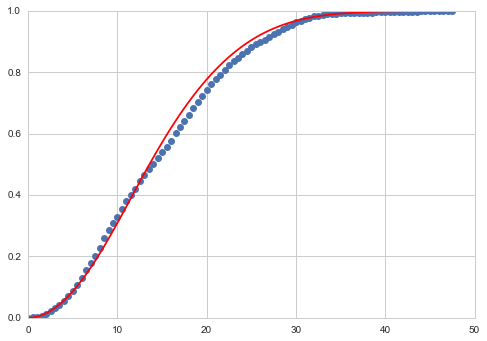

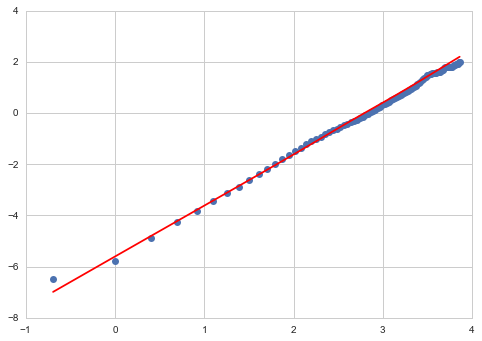

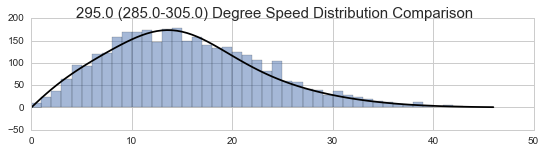

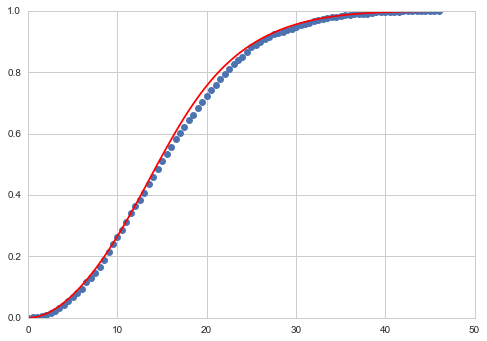

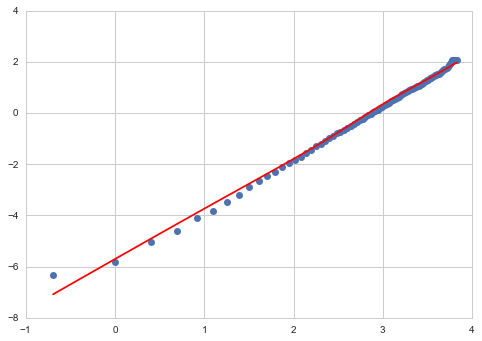

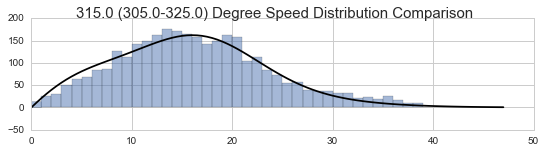

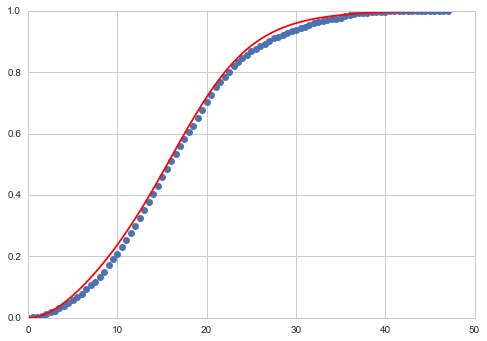

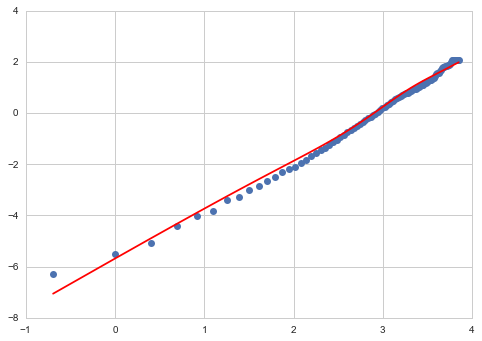

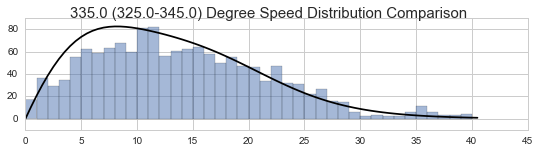

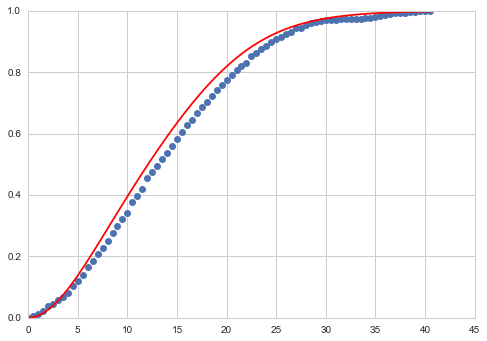

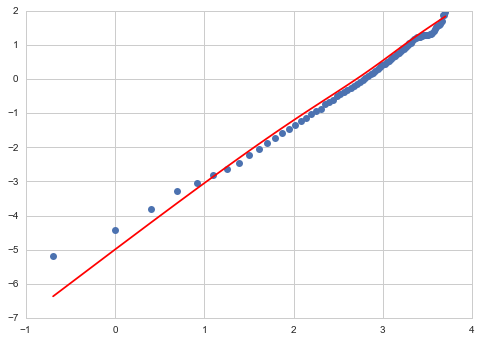

In [60]:
if cn_database:
    model_data_comparison(df, 22.5, 22.5)
else: 
    model_data_comparison(df, 10, 20)

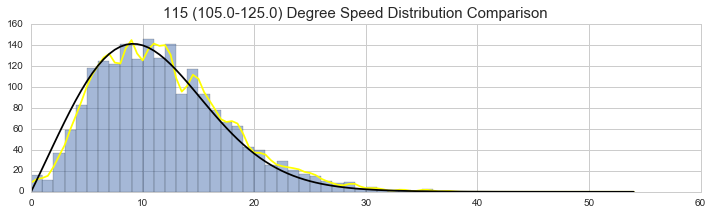

In [61]:
angle =  115
incre = 20

angle_radian, incre_radian = radians(angle), radians(incre)  
x_vals = np.arange(0, max_speed, 0.5)

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
sub_df= df[(df['dir'] >= start_angle) & (df['dir'] <= end_angle)] 
max_speed = sub_df.speed.max()

# 1. Observation
bins = np.arange(0, max_speed, 1)
sub_df['speed'].hist(bins=bins, alpha=0.5,figsize=(12, 3))

# 2. 1d KDE 
sample = np.array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [np.exp(sub_kde.score_samples(x_val))*len(sample) for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

# 3. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.5, x_val+0.5],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x_vals]
y_vals = np.array(zip(*y_vals_)[0])*len(df) 
plt.plot(x_vals, y_vals,'-', color='black')

title = str(angle) + ' (' + str(start_angle) + '-' +str(end_angle) + ')'
plt.suptitle(title+' Degree Speed Distribution Comparison', fontsize = 15)
plt.show()

## Bootstrap, to see the variance of each sector

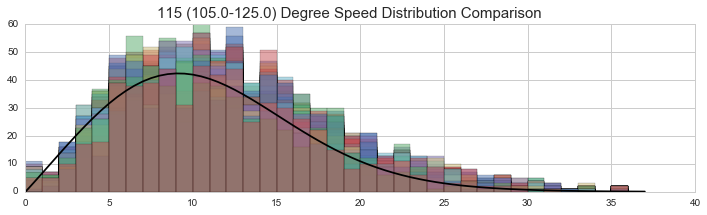

In [62]:
x_vals = np.arange(0, max_speed, 0.5)
y_vals_ =[integrate.nquad(f, [[x_val-0.5, x_val+0.5],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x_vals]
y_vals = np.array(zip(*y_vals_)[0])*len(df.speed)*0.3
plt.plot(x_vals, y_vals,'-', color='black')

bins = np.arange(0, max_speed, 1)
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=0.3, replace=True)
    sub_df_resampled['speed'].hist(bins=bins, alpha=0.5,figsize=(12, 3))

title = str(angle) + ' (' + str(start_angle) + '-' +str(end_angle) + ')'
plt.suptitle(title+' Degree Speed Distribution Comparison', fontsize = 15)

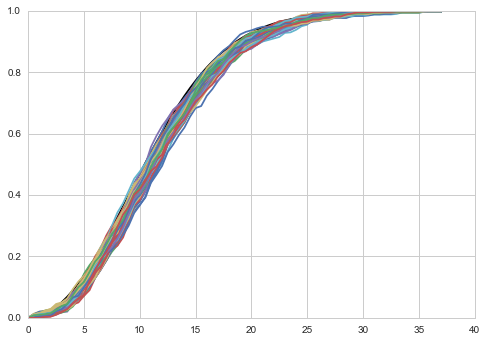

In [63]:
x = np.arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = np.array(zip(*y_)[0])/direction_prob[0]
plt.plot(x, y_gmm,'-', color = 'black')
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=0.3, replace=True)
    
    sample = sub_df_resampled.speed
    ecdf = sm.distributions.ECDF(sample)
    y_cdf = ecdf(x)

    plt.plot(x, y_cdf,'-')

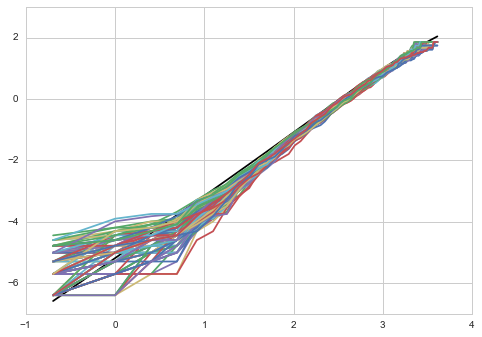

In [64]:
plt.plot(np.log(x), np.log(-np.log(1-y_gmm)),'-', color = 'black')
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=0.3, replace=True)
    
    sample = sub_df_resampled.speed
    ecdf = sm.distributions.ECDF(sample)
    y_cdf = ecdf(x)

    plt.plot(np.log(x), np.log(-np.log(1-y_cdf)),'-')

# Cross Validation, to check the number of ellipse to be fitted

In [65]:
from sklearn.cross_validation import train_test_split, KFold
    
def fit_gmm(df, number_of_gaussian = 3, fit_method = 'square_error', print_result = False):
    # 1. Create Input, speed_set
    sample = sub_speed_set = np.array(zip(df.x, df.y))
    points = fitting_range
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    kde_result = np.exp(kde.score_samples(points))

    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf, print_result)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-30, 30),(-30, 30),(0., 30),(0., 30),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)       
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit}

In [66]:
## 5-fold cross validation
CV_result_all =[]
print 'Number of train/test dataset', len(df)*4/5, len(df)/5

for number_of_gaussian in xrange(1,6):
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=5, shuffle=True) # each number of gaussian, fit 4 times

    CV_result = []
    for train_index, test_index in kf:
        sub_df = df.iloc[train_index]
        sub_df_test = df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = 'chi_square')
        gmm_pdf_result_train = result['gmm_pdf_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = np.array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = np.exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result, 
                                            count = len(sub_df))
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test, 
                                            count = len(sub_df_test))
        
        display(pd.DataFrame([gof_train, gof_test], index=["gof_train", "gof_test"]))
        
        CV_result.append(gof_test)
        
    CV_result_all.append(CV_result)

Number of train/test dataset 34209.6 8552.4
  
Number of gaussian 1


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,2277.329547,0.015947,2.016951e-08,0.083239,0.269077,0.882707
gof_test,614.874172,0.012270,2.153720e-08,0.081353,0.278689,0.876707


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,2289.063513,0.016634,2.022840e-08,0.083360,0.26947,0.882364
gof_test,748.573539,0.017288,2.546626e-08,0.090691,0.30283,0.851541


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,2303.460381,0.017141,2.049023e-08,0.083898,0.271208,0.880842
gof_test,675.632344,0.021660,2.492912e-08,0.079552,0.299122,0.861781


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,2305.256842,0.017406,2.052570e-08,0.083971,0.271443,0.880635
gof_test,665.943802,0.019846,2.299428e-08,0.082279,0.286446,0.866512


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,2300.167599,0.016731,2.044496e-08,0.083805,0.270908,0.881105
gof_test,727.765321,0.018644,2.686482e-08,0.083752,0.310294,0.851325


  
Number of gaussian 2


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,832.565565,0.004459,8.498587e-09,0.054032,0.174664,0.950577
gof_test,295.489758,0.004419,1.091787e-08,0.063644,0.198960,0.934647


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,834.999781,0.005072,8.470027e-09,0.053941,0.174370,0.950744
gof_test,347.848968,0.007239,1.205331e-08,0.062077,0.207868,0.928887


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,833.478913,0.003281,8.643560e-09,0.054491,0.176147,0.949734
gof_test,300.271551,0.001211,1.275649e-08,0.063545,0.213640,0.929687


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,831.654223,0.004499,8.572717e-09,0.054267,0.175424,0.950146
gof_test,370.824279,0.003410,1.361558e-08,0.060988,0.220647,0.923849


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,833.915229,0.005257,8.732006e-09,0.054769,0.177046,0.94922
gof_test,302.150731,0.009279,1.311310e-08,0.059506,0.216809,0.92788


  
Number of gaussian 3


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,589.545601,0.003282,6.526297e-09,0.047349,0.153060,0.962047
gof_test,244.615923,0.007433,9.962567e-09,0.056527,0.190091,0.943136


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,590.099832,0.003799,6.642512e-09,0.047769,0.154417,0.961371
gof_test,301.968036,0.009797,1.278087e-08,0.058316,0.213815,0.930796


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,588.760335,0.002803,6.455217e-09,0.047090,0.152225,0.962460
gof_test,245.374620,0.002350,9.178367e-09,0.056753,0.180856,0.946249


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,591.589670,0.002342,6.540307e-09,0.047400,0.153225,0.961966
gof_test,262.993208,0.003631,9.638664e-09,0.052661,0.185217,0.944533


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,589.249630,0.003347,6.521962e-09,0.047333,0.153010,0.962072
gof_test,246.609866,0.006493,1.046922e-08,0.053175,0.194744,0.939738


  
Number of gaussian 4


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,492.919853,0.001635,6.023536e-09,0.045489,0.147047,0.964971
gof_test,219.698183,0.001632,9.410509e-09,0.054873,0.183792,0.946602


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,495.086631,0.001636,6.092831e-09,0.045750,0.147890,0.964568
gof_test,234.357732,0.002055,1.036847e-08,0.055218,0.191805,0.942796


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,498.154835,0.001863,6.064253e-09,0.045642,0.147543,0.964734
gof_test,230.980759,0.004059,1.005194e-08,0.056161,0.189681,0.943220


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,496.381525,0.003509,6.116875e-09,0.045840,0.148182,0.964428
gof_test,281.518298,0.014624,1.221955e-08,0.055617,0.210342,0.931167


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,495.103164,0.001630,6.085248e-09,0.045721,0.147798,0.964612
gof_test,242.764075,0.012155,9.661557e-09,0.055213,0.186793,0.942346


  
Number of gaussian 5


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,319.828103,0.003249,3.095145e-09,0.032608,0.105407,0.982001
gof_test,182.902825,0.006918,6.352262e-09,0.042716,0.151429,0.963389


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,320.203914,0.004261,3.102858e-09,0.032648,0.105538,0.981956
gof_test,160.395191,0.007269,6.453663e-09,0.047815,0.152248,0.961980


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,320.607732,0.003536,3.119592e-09,0.032736,0.105823,0.981858
gof_test,194.896811,0.005656,7.135433e-09,0.047167,0.159694,0.959068


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,323.537163,0.004633,3.183553e-09,0.033070,0.106902,0.981486
gof_test,237.813449,0.014282,8.894533e-09,0.047987,0.178751,0.950580


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
gof_train,319.207743,0.003085,3.122520e-09,0.032751,0.105872,0.981841
gof_test,194.943332,0.007729,8.045774e-09,0.047036,0.169736,0.955656


In [67]:
for idx, gof_group in enumerate(CV_result_all):
    print 'number of gaussian', idx+1
    display(pd.DataFrame(gof_group))

number of gaussian 1


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,614.874172,0.012270,2.153720e-08,0.081353,0.278689,0.876707
1,748.573539,0.017288,2.546626e-08,0.090691,0.302830,0.851541
2,675.632344,0.021660,2.492912e-08,0.079552,0.299122,0.861781
3,665.943802,0.019846,2.299428e-08,0.082279,0.286446,0.866512
4,727.765321,0.018644,2.686482e-08,0.083752,0.310294,0.851325


number of gaussian 2


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,295.489758,0.004419,1.091787e-08,0.063644,0.198960,0.934647
1,347.848968,0.007239,1.205331e-08,0.062077,0.207868,0.928887
2,300.271551,0.001211,1.275649e-08,0.063545,0.213640,0.929687
3,370.824279,0.003410,1.361558e-08,0.060988,0.220647,0.923849
4,302.150731,0.009279,1.311310e-08,0.059506,0.216809,0.927880


number of gaussian 3


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,244.615923,0.007433,9.962567e-09,0.056527,0.190091,0.943136
1,301.968036,0.009797,1.278087e-08,0.058316,0.213815,0.930796
2,245.374620,0.002350,9.178367e-09,0.056753,0.180856,0.946249
3,262.993208,0.003631,9.638664e-09,0.052661,0.185217,0.944533
4,246.609866,0.006493,1.046922e-08,0.053175,0.194744,0.939738


number of gaussian 4


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,219.698183,0.001632,9.410509e-09,0.054873,0.183792,0.946602
1,234.357732,0.002055,1.036847e-08,0.055218,0.191805,0.942796
2,230.980759,0.004059,1.005194e-08,0.056161,0.189681,0.943220
3,281.518298,0.014624,1.221955e-08,0.055617,0.210342,0.931167
4,242.764075,0.012155,9.661557e-09,0.055213,0.186793,0.942346


number of gaussian 5


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,182.902825,0.006918,6.352262e-09,0.042716,0.151429,0.963389
1,160.395191,0.007269,6.453663e-09,0.047815,0.152248,0.961980
2,194.896811,0.005656,7.135433e-09,0.047167,0.159694,0.959068
3,237.813449,0.014282,8.894533e-09,0.047987,0.178751,0.950580
4,194.943332,0.007729,8.045774e-09,0.047036,0.169736,0.955656


In [68]:
mean_gof_all = []
for idx, gof_group in enumerate(CV_result_all):
    mean_gof = np.mean(pd.DataFrame(gof_group))
    mean_gof_all.append(mean_gof)
mean_gof_all = pd.DataFrame(mean_gof_all)
mean_gof_all

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,686.557835,0.017942,2.435834e-08,0.083526,0.295476,0.861573
1,323.317057,0.005112,1.249127e-08,0.061952,0.211585,0.928990
2,260.312331,0.005941,1.040594e-08,0.055486,0.192945,0.940890
3,241.863810,0.006905,1.034240e-08,0.055416,0.192483,0.941226
4,194.190322,0.008371,7.376333e-09,0.046544,0.162372,0.958135


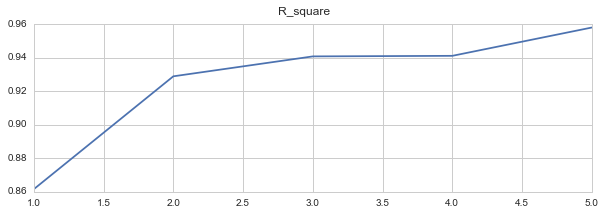

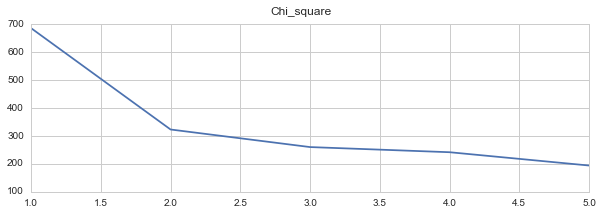

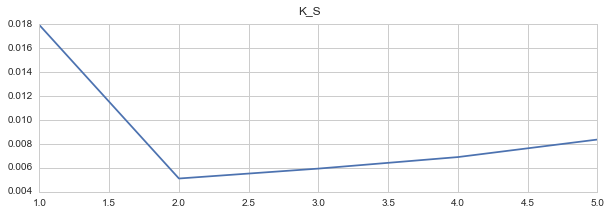

In [69]:
x = [1,2,3,4,5]
for column in ['R_square','Chi_square', 'K_S']:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 3)
    plt.plot(x, mean_gof_all[column],'-')
    plt.suptitle(column)
    plt.show()